## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="left")
# Display the data table for preview
merged_data_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
merged_data_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merged_data_no_dubs_df = merged_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
merged_data_no_dubs_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
merged_data_no_dubs_df['Mouse ID'].nunique()

249

## Summary Statistics

In [5]:
# Generate a summary statistics table of 
#mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_df = merged_data_no_dubs_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# This method produces everything in a single groupby function
Stats_df = tumor_volume_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg(['mean', 'median','var', 'std','sem'])
Stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

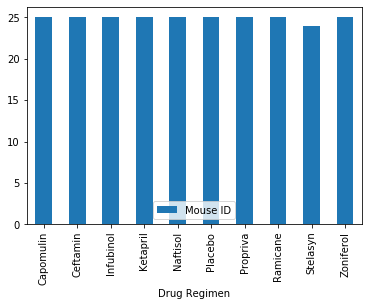

In [6]:
# Generate a bar plot showing the total number of 
#mice for each treatment throughout the course of the study using pandas. 

#Gets the total amount of mice including there drug treatment
mouse_count_w_drug_df = tumor_volume_df.drop_duplicates(subset=['Mouse ID'])
mouse_count_w_drug_df

#Counts drug use based on the dataframe above
drug_counts_df = mouse_count_w_drug_df.groupby(['Drug Regimen']).count()
counts_df = drug_counts_df.drop(columns='Tumor Volume (mm3)')

#This gets all the drug names into a list to use for the column names
drugs_name_list = tumor_volume_df['Drug Regimen'].tolist()
drugs_list_no_dups = list(dict.fromkeys(drugs_name_list))



#this shows the graph
counts_df.plot.bar()
#counts_df



<function matplotlib.pyplot.show(*args, **kw)>

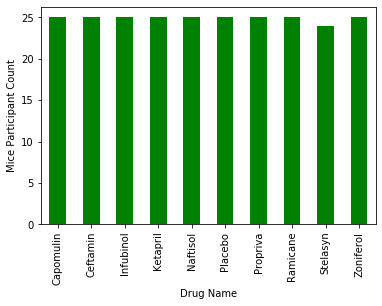

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#this line gets the x plain values - should be 1-10
counts_df.plot(kind='bar', facecolor='green')
plt.ylabel("Mice Participant Count")
plt.xlabel("Drug Name")
plt.legend().remove()
plt.show

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


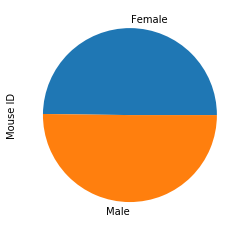

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Gets gender count
gender_counts_df = mouse_metadata_df.groupby(['Sex']).count()
gender_counts_df.reset_index()
# Cleans dataframe to have a single column
clean_gender_counts_df = gender_counts_df.drop(['Drug Regimen', 'Age_months', 'Weight (g)'], axis=1)
Gender_df = clean_gender_counts_df.rename(columns={"Mouse ID":""})


#creates py chart
#This does not work??
plt.xlabel = ''
plt.ylabel='bon'
plt.title = 'Gender Comparison'

#This works
plot = clean_gender_counts_df.plot.pie(subplots=True)
plt.legend().remove()
#plt.show()


C:\Users\Ty\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


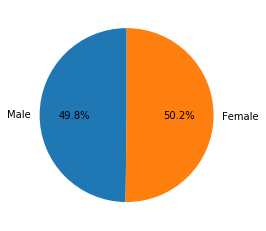

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_count_list = Gender_df.values.tolist()
Gender_list= ["Male", "Female"]

plt.pie(Gender_count_list, labels=Gender_list, autopct='%1.1f%%',startangle=90)
#plt.title('Gender Comparison')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
